In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import joblib

In [2]:
#Read data
data=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\churn_data.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
data["OverageFee"].max()

18.19

In [4]:
#checking for missing value
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

*The data does not have any missing values*

In [5]:
data.shape

(3333, 11)

[]

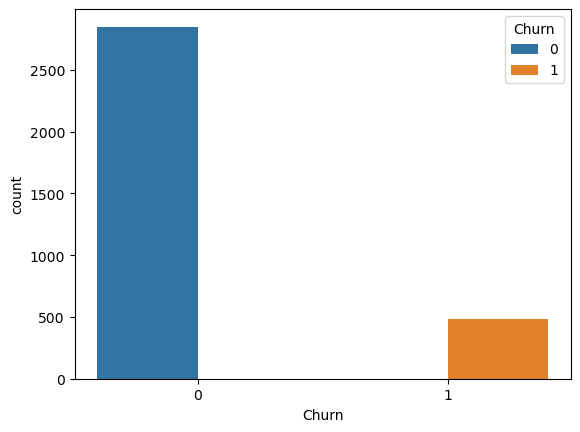

In [6]:
#class- wsie distribution of label 'churn
sns.countplot(x='Churn',data=data,hue='Churn')
plt.plot()

The distribution of customer churn rate indicates there is a huge difference in the rate. Churned customers are very less compared to non-churned customers

In [7]:
#Frequency of each variable counted
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

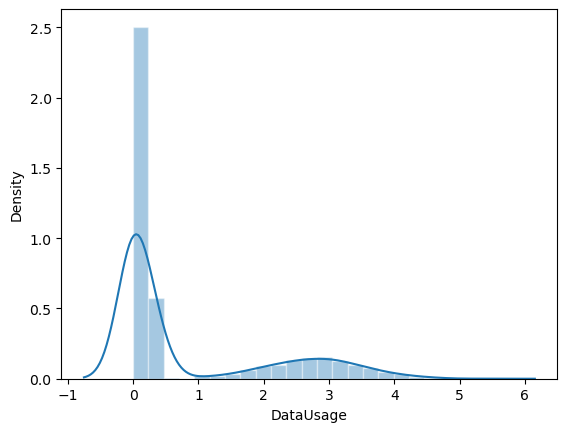

In [8]:
sns.histplot(data['DataUsage'], kde=True,stat="density",
             kde_kws=dict(cut=3),alpha=.4,edgecolor=(1, 1, 1, .4))
plt.show()

In [9]:
#performing basic EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [10]:
#performing basic EDA
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [11]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [12]:
#selecting the predictors and label value
X = data[["DataPlan", "DataUsage", "CustServCalls", "DayMins", "DayCalls", "MonthlyCharge", "OverageFee"]]
Y = data['Churn']

In [13]:
#training and testing at 70:30 ratio
from sklearn.model_selection import train_test_split
#The best accuracy achieved with 80:20 split
#training and testing at 80:20 ratio
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2,random_state=1)

dt=DecisionTreeClassifier(max_depth=6,random_state=1,criterion='entropy')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)

In [14]:
#Create a Pickle file using serialization 
import pickle
pkle_out=open("dt.pkl","wb")
pickle.dump(dt,pkle_out)
pkle_out.close()

In [15]:
X.dtypes

DataPlan           int64
DataUsage        float64
CustServCalls      int64
DayMins          float64
DayCalls           int64
MonthlyCharge    float64
OverageFee       float64
dtype: object

In [16]:
'''model = pickle.load(open('dt.pkl','rb'))
print(f'Predicted value is : {model.predict([[1, 2, 2, 1, 5,6,7]])[0]}')'''

"model = pickle.load(open('dt.pkl','rb'))\nprint(f'Predicted value is : {model.predict([[1, 2, 2, 1, 5,6,7]])[0]}')"

In [17]:
#Function for classification based on inputs
def contract_pred(a, b, c, d, e,f,g):
    arr = np.array([a, b, c, d, e,f,g]) # Convert to numpy array
    arr = arr.astype(np.float64) # Change the data type to float
    query = arr.reshape(1, -1) # Reshape the array
    
    if dt.predict(query)[0] ==1: 
        prediction = 'customer Lost' 
    else: 
        prediction = 'Customer Stays'
        
    return prediction #Return the prediction